## Data Preprocessing and Cleaning

In [1]:
# install.packages("WDI")
# install.packages("ggplot2")
# install.packages("gganimate")
# install.packages("tidyverse")
# install.packages("visdat")
# install.packages("rvest")
# install.packages("corrgram")  
# install.packages("gridExtra") 
# install.packages("visdat")
# install.packages("imputeTS")
# install.packages("randomForest")  
# install.packages("caret") 
# install.packages("kernlab")
# install.packages("pls")

In [2]:
library(WDI)
library(ggplot2)
library(gganimate)
library(tidyverse)
library(visdat)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Retrieve data 
df <- WDI(country = "all", 
          indicator = c("NY.GDP.MKTP.CD", "BN.KLT.DINV.CD", "NY.GDP.MKTP.KD.ZG", "FP.CPI.TOTL.ZG", "SL.UEM.TOTL.ZS"), 
          extra = TRUE, 
          cach = NULL)

To understand the characteristics of New Zealand's unemployment rate, we examine the features it possesses.

In [4]:
nz <- df %>%
  filter(iso2c == "NZ")

head(nz, 2)

,country,iso2c,iso3c,year,status,lastupdated,NY.GDP.MKTP.CD,BN.KLT.DINV.CD,NY.GDP.MKTP.KD.ZG,FP.CPI.TOTL.ZG,SL.UEM.TOTL.ZS,region,capital,longitude,latitude,income,lending
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,New Zealand,NZ,NZL,1986,,2023-09-19,30604668357,NA,2.7056417,13.2134,NA,East Asia & Pacific,Wellington,174.776,-41.2865,High income,Not classified
2,New Zealand,NZ,NZL,1987,,2023-09-19,40375812560,NA,0.9708387,15.7443,NA,East Asia & Pacific,Wellington,174.776,-41.2865,High income,Not classified


In [5]:
similar_df <- df %>%
  filter(region == "East Asia & Pacific", grepl("High income", income))

head(similar_df)

,country,iso2c,iso3c,year,status,lastupdated,NY.GDP.MKTP.CD,BN.KLT.DINV.CD,NY.GDP.MKTP.KD.ZG,FP.CPI.TOTL.ZG,SL.UEM.TOTL.ZS,region,capital,longitude,latitude,income,lending
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Australia,AU,AUS,1962,,2023-09-19,19922563190,NA,1.294611,-0.3194888,NA,East Asia & Pacific,Canberra,149.129,-35.282,High income,Not classified
2,Australia,AU,AUS,1963,,2023-09-19,21539843449,NA,6.216107,0.6410256,NA,East Asia & Pacific,Canberra,149.129,-35.282,High income,Not classified
3,Australia,AU,AUS,2003,,2023-09-19,467497961561,9612586773,3.111398,2.7325960,5.93,East Asia & Pacific,Canberra,149.129,-35.282,High income,Not classified
4,Australia,AU,AUS,1961,,2023-09-19,19682883152,NA,2.482656,2.2875817,NA,East Asia & Pacific,Canberra,149.129,-35.282,High income,Not classified
5,Australia,AU,AUS,2002,,2023-09-19,395573025330,-7681971735,3.993590,2.9815745,6.37,East Asia & Pacific,Canberra,149.129,-35.282,High income,Not classified
6,Australia,AU,AUS,1994,,2023-09-19,322809408509,-2630684042,3.980923,1.9696348,9.72,East Asia & Pacific,Canberra,149.129,-35.282,High income,Not classified


In [6]:
similar_df <- similar_df %>%
  select(
    country,
    iso3c, 
    year,
    NY.GDP.MKTP.CD,
    BN.KLT.DINV.CD,
    NY.GDP.MKTP.KD.ZG,
    FP.CPI.TOTL.ZG,
    SL.UEM.TOTL.ZS,
  ) %>%
  arrange(
    country,
    year
  )

In [7]:
similar_df <- similar_df %>%
  rename(
    Country = country,
    Country_Code = iso3c,
    Year = year, 
    Foreign_Investment = BN.KLT.DINV.CD,
    GDP = NY.GDP.MKTP.CD,
    GDP_Growth = NY.GDP.MKTP.KD.ZG,
    CPI = FP.CPI.TOTL.ZG,
    Unemployment_Rate = SL.UEM.TOTL.ZS,
  )

In [8]:
head(similar_df)

,Country,Country_Code,Year,GDP,Foreign_Investment,GDP_Growth,CPI,Unemployment_Rate
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Australia,AUS,1960,18606562979,NA,NA,3.7288136,NA
2,Australia,AUS,1961,19682883152,NA,2.482656,2.2875817,NA
3,Australia,AUS,1962,19922563190,NA,1.294611,-0.3194888,NA
4,Australia,AUS,1963,21539843449,NA,6.216107,0.6410256,NA
5,Australia,AUS,1964,23801123811,NA,6.980061,2.8662420,NA
6,Australia,AUS,1965,25976164159,NA,5.980438,3.4055728,NA


In [9]:
similar_df <- similar_df %>%
  mutate_all(~trimws(.)) %>%  
  mutate(
    Year = as.numeric(Year),
    GDP = as.numeric(GDP),
    Foreign_Investment = as.numeric(Foreign_Investment),
    GDP_Growth = as.numeric(GDP_Growth),
    CPI = as.numeric(CPI),
    Unemployment_Rate = as.numeric(Unemployment_Rate)
  )

head(similar_df)

,Country,Country_Code,Year,GDP,Foreign_Investment,GDP_Growth,CPI,Unemployment_Rate
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Australia,AUS,1960,18606562979,NA,NA,3.7288136,NA
2,Australia,AUS,1961,19682883152,NA,2.482656,2.2875817,NA
3,Australia,AUS,1962,19922563190,NA,1.294611,-0.3194888,NA
4,Australia,AUS,1963,21539843449,NA,6.216107,0.6410256,NA
5,Australia,AUS,1964,23801123811,NA,6.980061,2.8662420,NA
6,Australia,AUS,1965,25976164159,NA,5.980438,3.4055728,NA


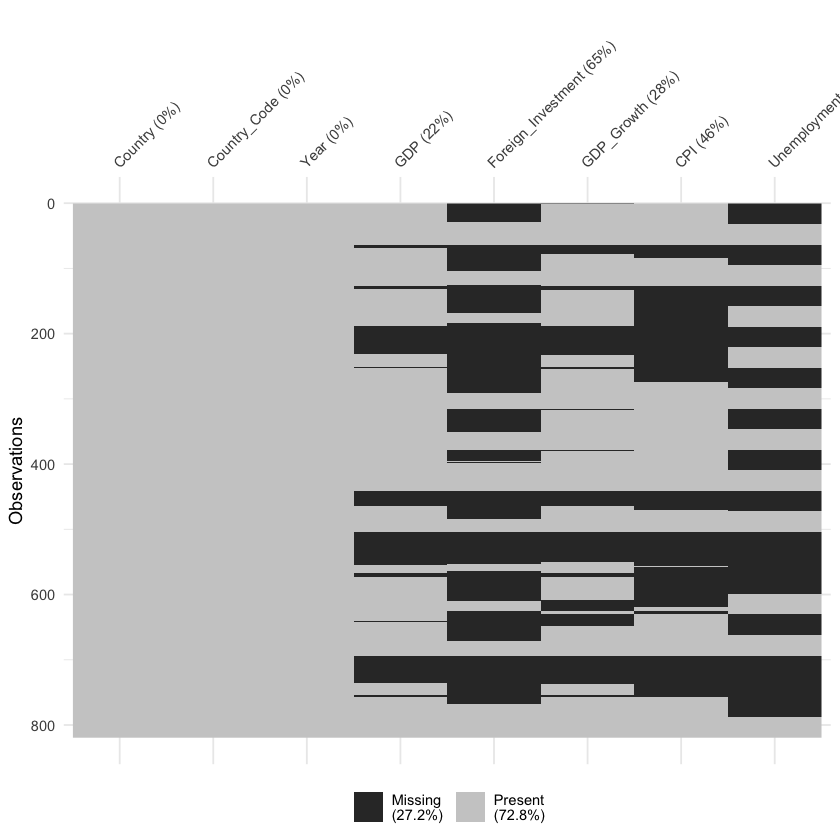

In [10]:
Missing_Value <- vis_miss(similar_df)
Missing_Value

Many missing values are observed in the unemployment rate data, and they often coincide with missing values in foreign investment. Therefore, we need to clean up the missing data.

In [11]:
Unemployment_Rate_df <- similar_df[, c("Country", "Year", "Unemployment_Rate")]

wide_Unemployment_Rate_df <- pivot_wider(Unemployment_Rate_df, names_from = "Year", values_from = "Unemployment_Rate")

wide_Unemployment_Rate_df

Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,⋯,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,5.660,6.08,6.050,5.710,5.590,5.300,5.160,6.460,5.120,3.661
Brunei Darussalam,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,6.770,6.86,7.693,8.432,9.320,8.700,6.920,7.410,7.446,7.203
French Polynesia,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,12.117,12.14,12.087,12.085,11.975,12.081,12.135,13.670,13.265,13.098
Guam,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,11.500,7.60,6.900,5.400,5.430,5.547,5.477,6.577,6.250,6.134
"Hong Kong SAR, China",NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,3.400,3.30,3.310,3.390,3.120,2.810,2.920,5.810,5.170,5.058
Japan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4.040,3.59,3.390,3.130,2.820,2.470,2.350,2.800,2.800,2.641
"Korea, Rep.",NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,2.750,3.08,3.550,3.650,3.650,3.820,3.750,3.930,3.640,2.788
"Macao SAR, China",NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.820,1.67,1.810,1.940,1.990,1.830,1.750,2.570,2.253,2.627
Nauru,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [12]:
# Define a function to find the first column with non-missing values 
find_first_non_missing_column <- function(df) {
  column_names <- names(df)
  for (i in 2:length(column_names)) {  # Start searching from the second column
    col <- column_names[i]
    if (!all(is.na(df[[col]]))) {
      return(col)
    }
  }
  return(NULL)  # Return NULL if no matching column is found
}

# Call the function and output the result
first_non_missing_column <- find_first_non_missing_column(wide_Unemployment_Rate_df)
if (!is.null(first_non_missing_column)) {
  cat("The first year with recorded unemployment rate data is: ")
  cat(first_non_missing_column, "\n")
} else {
  cat("All columns have only missing values.\n")
}

The first year with recorded unemployment rate data is: 1991 


Since the unemployment rate data has been recorded since 1991, we will remove the records in the data frame that are from before 1991.

In [13]:
wide_Unemployment_Rate_df <- wide_Unemployment_Rate_df %>%
  select(-`1960`:-`1990`)
wide_Unemployment_Rate_df

Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,⋯,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,9.580,10.730,10.870,9.720,8.470,8.510,8.360,7.680,6.870,⋯,5.660,6.08,6.050,5.710,5.590,5.300,5.160,6.460,5.120,3.661
Brunei Darussalam,4.700,4.824,4.863,5.004,5.125,5.202,5.234,5.346,5.502,⋯,6.770,6.86,7.693,8.432,9.320,8.700,6.920,7.410,7.446,7.203
French Polynesia,12.046,12.293,12.306,12.207,12.180,12.145,11.980,11.628,11.732,⋯,12.117,12.14,12.087,12.085,11.975,12.081,12.135,13.670,13.265,13.098
Guam,3.510,3.840,5.530,7.600,7.900,8.280,9.670,7.740,13.950,⋯,11.500,7.60,6.900,5.400,5.430,5.547,5.477,6.577,6.250,6.134
"Hong Kong SAR, China",1.800,1.960,1.960,1.900,3.220,2.830,2.220,4.580,6.250,⋯,3.400,3.30,3.310,3.390,3.120,2.810,2.920,5.810,5.170,5.058
Japan,2.100,2.200,2.500,2.900,3.200,3.400,3.400,4.100,4.700,⋯,4.040,3.59,3.390,3.130,2.820,2.470,2.350,2.800,2.800,2.641
"Korea, Rep.",2.410,2.510,2.880,2.480,2.060,2.050,2.610,6.960,6.340,⋯,2.750,3.08,3.550,3.650,3.650,3.820,3.750,3.930,3.640,2.788
"Macao SAR, China",3.010,2.200,2.060,2.480,3.580,4.250,3.260,4.610,6.350,⋯,1.820,1.67,1.810,1.940,1.990,1.830,1.750,2.570,2.253,2.627
Nauru,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


We can see that missing values all appear in the same country; therefore, we can directly delete these countries.

In [14]:
wide_Unemployment_Rate_df <- na.omit(wide_Unemployment_Rate_df)

In [15]:
long_Unemployment_Rate_df <- wide_Unemployment_Rate_df %>%
  pivot_longer(cols = -Country, names_to = "Year", values_to = "Unemployment_Rate")

head(long_Unemployment_Rate_df)

Country,Year,Unemployment_Rate
<chr>,<chr>,<dbl>
Australia,1991,9.58
Australia,1992,10.73
Australia,1993,10.87
Australia,1994,9.72
Australia,1995,8.47
Australia,1996,8.51


In [16]:
# Perform a left join to add specified columns from similar_df to long_Unemployment_Rate_df
long_df <- long_Unemployment_Rate_df %>%
  mutate(key = paste(Country, Year, sep = "_")) %>%
  left_join(
    similar_df %>%
      mutate(key = paste(Country, Year, sep = "_")),
    by = "key"
  ) %>%
  select(-key, -Unemployment_Rate.y, -Country.y, -Country_Code, -Year.y) %>%
  rename(
    Country = Country.x,
    Year = Year.x,
    Unemployment_Rate = Unemployment_Rate.x
  ) %>%
  mutate(Year = as.numeric(Year))

head(long_df)

Country,Year,Unemployment_Rate,GDP,Foreign_Investment,GDP_Growth,CPI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,1991,9.58,325981640935,-3782555746,-0.3830719,3.176675
Australia,1992,10.73,325532426233,-1106562011,0.4286196,1.012231
Australia,1993,10.87,312138139404,-2767984260,4.0474253,1.753653
Australia,1994,9.72,322809408509,-2630684042,3.9809233,1.969635
Australia,1995,8.47,368140778141,-9222498129,3.8871063,4.627767
Australia,1996,8.51,401310823653,441654791,3.8568412,2.615385


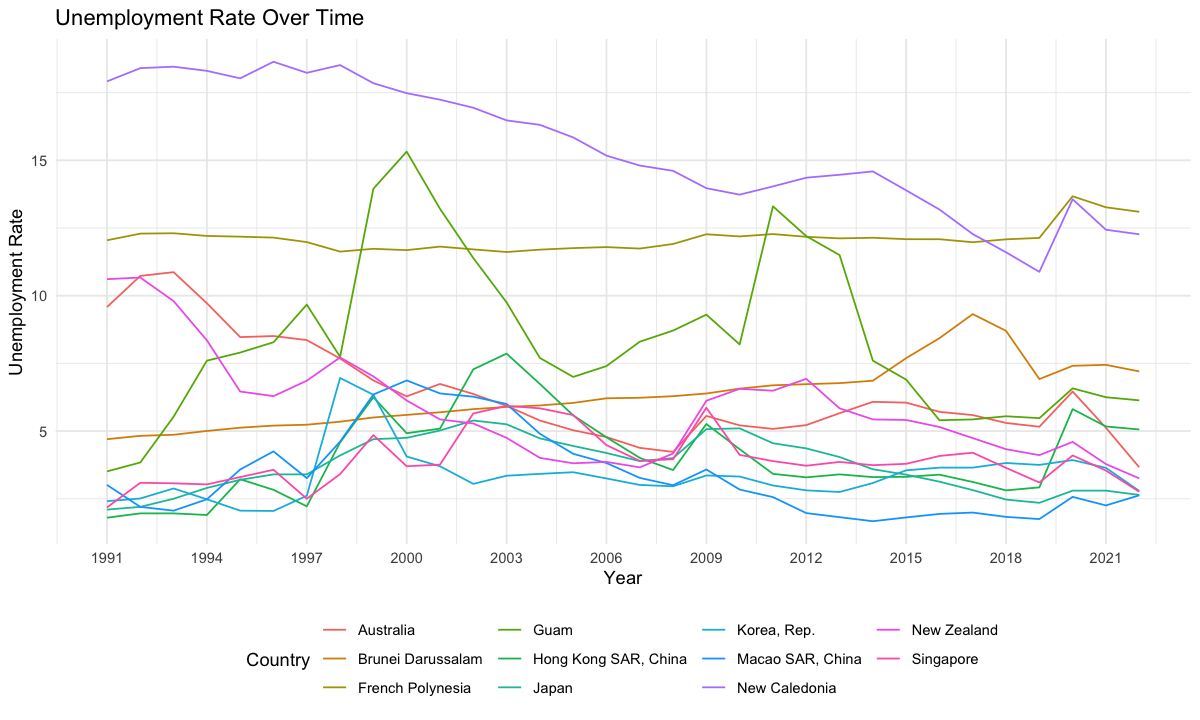

In [17]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(long_df, aes(x = Year, y = Unemployment_Rate, color = Country, group = Country)) +
  geom_line() +
  labs(title = "Unemployment Rate Over Time",
       x = "Year",
       y = "Unemployment Rate") +
  theme_minimal() +
  theme(legend.position = "bottom") +
  scale_x_continuous(breaks = seq(min(long_df$Year), max(long_df$Year), by = 3)) 

*Time Span:* 

The graph covers data from 1991 to 2021, providing a 30-year view of unemployment rates for several countries.

*Key Trends:*

*Australia:* Relatively stable unemployment rate with minor fluctuations.
*Guam:* Peak in 1997, followed by a decrease and gradual increase.
*Korea, Rep.:* Significant unemployment spike in the late 1990s, then stabilization.
*New Zealand:* Decreasing unemployment rate with some fluctuations.
*Brunei Darussalam and French Polynesia:* Noticeable fluctuations, particularly a sharp rise in Brunei Darussalam around 2017.
*Hong Kong SAR, China and Macao SAR, China:* Similar trends with periodic spikes and drops.
*Japan:* Slow decline in unemployment over the three decades.
*New Caledonia:* Rise in unemployment rates after 2015.
*Singapore:* Relatively stable trend with minor ups and downs.

*General Observation:* 

Many countries experienced an upward trend or spike in the late 1990s, potentially linked to global economic events during that period.

*Recent Trends:* 

Some countries, like Brunei Darussalam, New Caledonia, and Australia, have seen an increase in unemployment rates in the last few years.

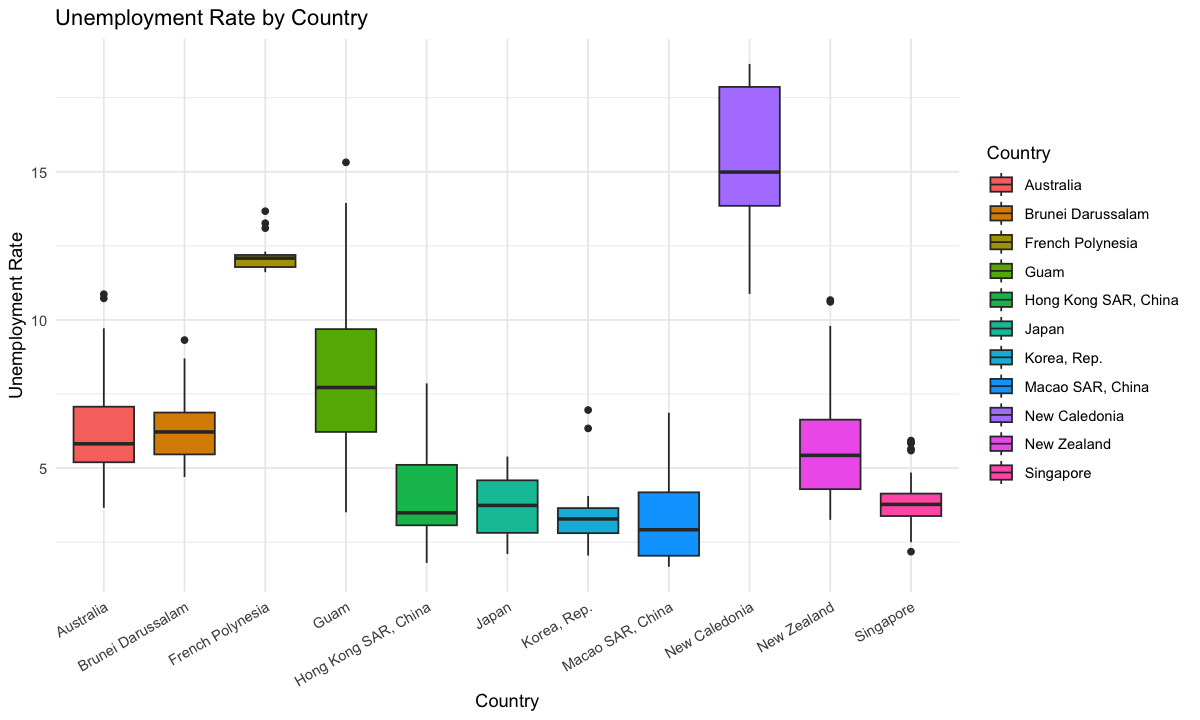

In [18]:
Unemployment_Rate_by_Country <- ggplot(long_df, aes(x = Country, y = Unemployment_Rate, fill = Country)) +
  geom_boxplot() +
  labs(title = "Unemployment Rate by Country",
       x = "Country",
       y = "Unemployment Rate") +
  theme_minimal() +
  scale_fill_discrete(name = "Country") +
  theme(axis.text.x = element_text(angle = 30, hjust = 1))
Unemployment_Rate_by_Country

In New Zealand, the unemployment rate hovers around 5%, which places it at a moderate level within the East Asia and Pacific region. It's higher than Hong Kong, Macau, Japan, Singapore, and South Korea, but lower than many other countries in the same Pacific region. When compared to Australia, which is also part of the Pacific region, the difference in unemployment rates is relatively small.

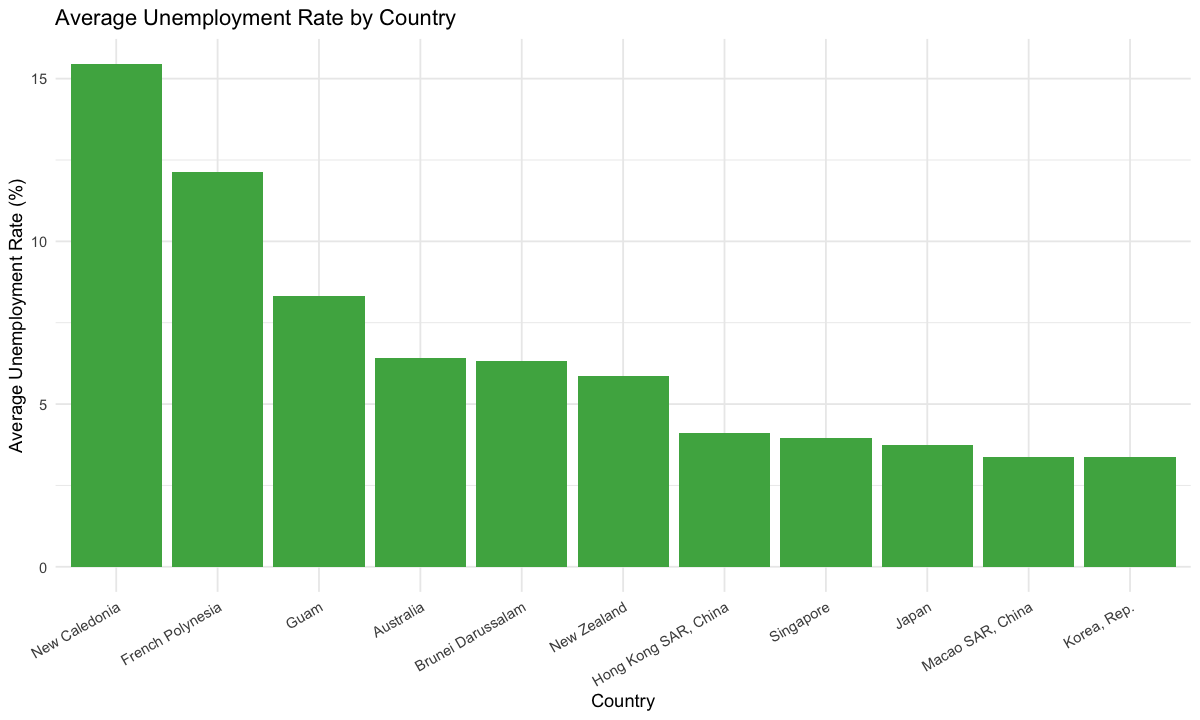

In [19]:
# Calculate the average unemployment rate for each country
mean_df <- long_df %>%
  group_by(Country) %>%
  summarise(mean_unemployment = mean(Unemployment_Rate))

# Sort the data based on the average unemployment rate
mean_df <- mean_df %>%
  arrange(desc(mean_unemployment))

# Create a bar plot
Average_Unemployment_Rate <- ggplot(mean_df, aes(x = reorder(Country, -mean_unemployment), y = mean_unemployment)) +
  geom_bar(stat = "identity", fill = "#4CAF50") +
  labs(title = "Average Unemployment Rate by Country",
       x = "Country",
       y = "Average Unemployment Rate (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 30, hjust = 1))
Average_Unemployment_Rate

The "Average Unemployment Rates by Country" graph offers a concise overview of unemployment rates across various nations, ranging from near 0% to approximately 15%. Notably, New Caledonia and French Polynesia have the highest average unemployment rates, both exceeding 10%, possibly indicating economic challenges or structural labor market issues. Meanwhile, Guam, Australia, Brunei Darussalam, and New Zealand fall within the 5-10% range, suggesting moderate unemployment scenarios. Major Asian economic centers, including Hong Kong SAR, China, Singapore, Japan, Macao SAR, China, and Korea, Rep., exhibit relatively low average unemployment rates, all below 5%, possibly reflecting robust economies and effective labor market policies.

We can also create additional charts to lay the groundwork for our future research and to validate the accuracy of our subsequent analyses regarding New Zealand.

Warning message:
“Removed 90 rows containing non-finite values (`stat_ydensity()`).”


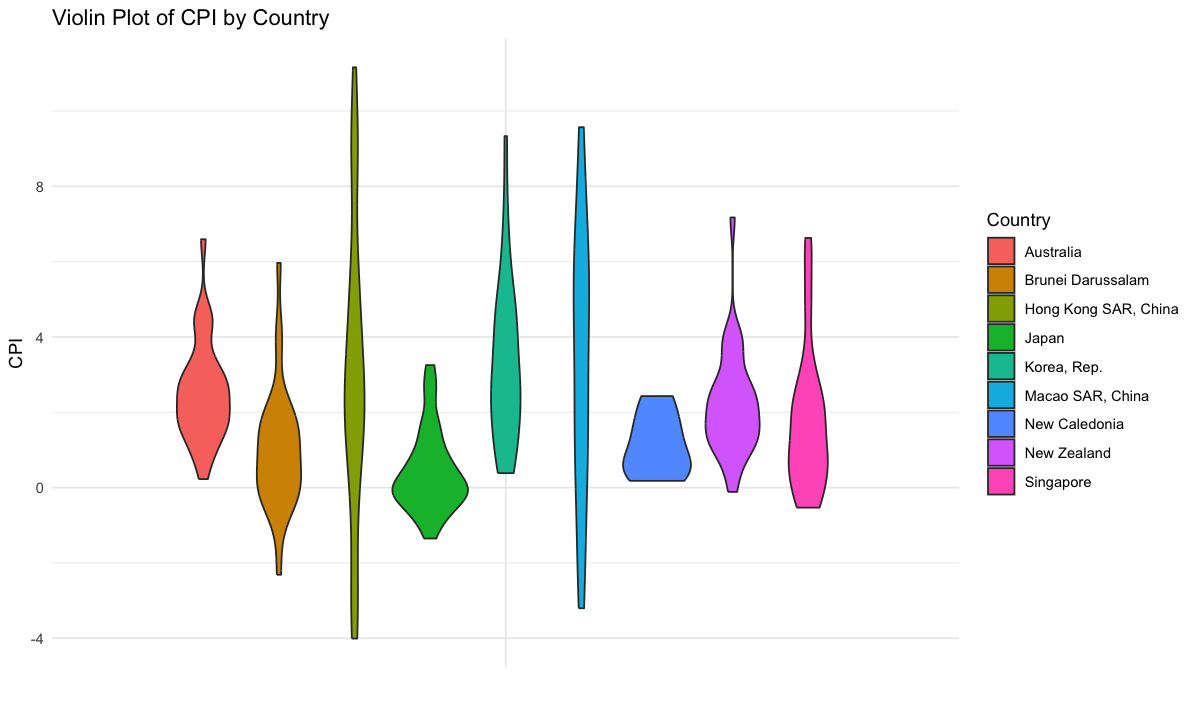

In [20]:
# Create a violin plot for the CPI column
ggplot(long_df, aes(x = "", y = CPI, fill = Country)) +
  geom_violin() +
  labs(title = "Violin Plot of CPI by Country",
       x = "",
       y = "CPI") +
  scale_fill_discrete(name = "Country") +
  theme_minimal()

Australia, shown in red, has a focused CPI distribution with most values around 4. Brunei Darussalam, in yellow, has a broader CPI range, suggesting significant variability. Hong Kong SAR, China (green) has a centered CPI with some outliers. Japan (blue) and Korea, Rep. (light green) both have concentrated CPIs near 4. Macao SAR, China (purple) shows two distinct CPI concentrations, indicating dual pricing trends. New Caledonia (pink) and New Zealand (light blue) exhibit wider CPI ranges, implying variability. Singapore (dark blue) has primarily concentrated CPI values above 4, indicating stability. Most countries center around a CPI of 4, but Brunei and New Caledonia display greater fluctuations, potentially influenced by economic conditions and policies.

In [21]:
nz_df <- long_df %>%
  filter(Country == "New Zealand")

In [22]:
head(nz_df)

Country,Year,Unemployment_Rate,GDP,Foreign_Investment,GDP_Growth,CPI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
New Zealand,1991,10.61,42744828653,NA,-1.090792,2.602393
New Zealand,1992,10.67,41649386970,NA,1.093834,1.014560
New Zealand,1993,9.80,46775038749,NA,6.391529,1.288208
New Zealand,1994,8.35,55313381443,NA,5.119248,1.745378
New Zealand,1995,6.46,63916899264,NA,4.722081,3.754944
New Zealand,1996,6.29,70140835299,NA,3.615674,2.285713


In [23]:
write.csv(nz_df, "nz_data.csv", row.names = FALSE)
ggsave("missing_data_plot.png", plot = Missing_Value)
ggsave("Unemployment_Rate_by_Country.png", plot = Unemployment_Rate_by_Country)
ggsave("Average_Unemployment_Rate.png", plot = Average_Unemployment_Rate)

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
